## Часть 2. 
### Реализация генетического алгоритма

In [1]:
from src import Genetic
# Из изображения получаем матрицу размером 512х512 из
# целочисленных значений от 0 до 255
# watermark = Watermark("pic/sailboat.png", "pic/logo.png")

genetic = Genetic("pic/sailboat.png", "pic/logo.png")

In [1]:
from src import Firefly

firefly = Firefly("pic/sailboat.png", "pic/logo.png")

#### 5.2 Extracting watermark
Погружение ЦВЗ, получение метрик PSNR и SSIM

In [15]:
from src import Watermark

watermark = Watermark(
    firefly.population[0], 
    firefly.embedded_image_bin, 
    firefly.image_matrix
)

In [3]:
genetic.all_candidates[2]

{'index': 1554,
 'entropy': 6.446291327421813,
 'origin': array([[ 19.,  23.,  19.,  27.,  14.,  21.,  16.,  17.],
        [ 14.,  23.,  25.,  18.,  13.,  23.,  17.,  16.],
        [ 24.,  14.,  23.,  24.,  16.,  19.,  17.,  21.],
        [ 37.,  36.,  47.,  40.,  35.,  46.,  31.,  41.],
        [ 65.,  98., 115., 107.,  61.,  54.,  60.,  57.],
        [136., 157., 168., 136., 123., 143., 118.,  78.],
        [201., 207., 204., 184., 177., 166., 142., 175.],
        [217., 220., 219., 220., 210., 190., 180., 166.]]),
 'sorted_i': 2}

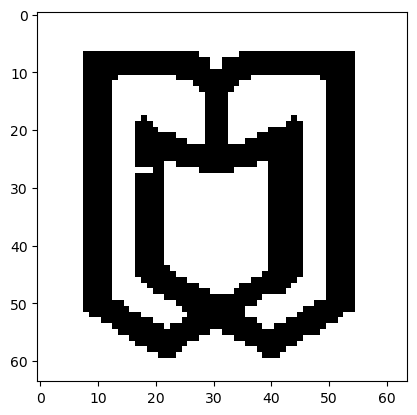

In [11]:
import matplotlib.pyplot as plt

plt.imshow(watermark.extracted_image_bin, cmap=plt.cm.gray)

In [ ]:
import math
import random
import numpy as np

# iterations = firefly.max_iterations
iterations = 100
_max = 2048
_min = 1
d_max = (_max - _min) * np.sqrt(1024)

for iteration in range(iterations):
    print(f"============== Iteration {iteration} ==============")
    count = 0
    b = (1 + iteration / iterations) * iterations
    
    for i in range(firefly.population_size):
        for j in range(i, firefly.population_size):
            if i != j:
                watermark_i = Watermark(
                    firefly.population[i], 
                    firefly.embedded_image_bin, 
                    firefly.image_matrix
                )
                watermark_j = Watermark(
                    firefly.population[j], 
                    firefly.embedded_image_bin, 
                    firefly.image_matrix
                )
                # Если у первого светлячка целевая функция меньше чем у второго 
                population_i = [a["index"] for a in firefly.population[i]]
                population_j = [b["index"] for b in firefly.population[j]]
                if watermark_i.evaluation < watermark_j.evaluation:
                    # То пересчитываем расстояние между светлячками
                    r = round(np.sum(np.abs(np.subtract(population_j, population_i))) / d_max, 2)
                    a = random.randint(1, 10)
                    # firefly.population[j] = 
                    # TODO: Вычислить индексы новых блоков по инкременту к сортировочному индексу
                    # а затем сформировать нового светлячка по полученным индексам
                    # Возможно следует подобрать новую структуру данных для всех блоков дабы 
                    # быстро производить маппинг разных элементов по индексам 
                    # x_j_new = [x["sorted_i"] + int(b * r) + a for x in firefly.population[j]]
                    x_j_new = []
                    
                    for x in firefly.population[j]:
                        x_new = (x["sorted_i"] + int(b * r) + a) % _max
                        x_j_new.append(x_new)
                    
                    new_firefly = []
                    for y in x_j_new:
                        new_firefly.append(firefly.all_candidates[y])

                    firefly.population[j] = new_firefly
                print(f"i eval: {watermark_i.evaluation}; j eval: {watermark_j.evaluation}")
                count +=1  # Считаем количество сравнений
    print(f"Всего выполнено {count} сравнений.")

============== Iteration 0 ==============
i eval: 2.5050709425522877; j eval: 2.5135617025563883
i eval: 2.5040868980079; j eval: 2.5080734048135476
i eval: 2.503979121347979; j eval: 2.5099614620607147
i eval: 2.5039939740271997; j eval: 2.516070642866227
i eval: 2.504238314007483; j eval: 2.502705761684447
i eval: 2.503974521693772; j eval: 2.5096593285366717
i eval: 2.5041790185455044; j eval: 2.509338285917564
i eval: 2.5038407962117164; j eval: 2.510259512667094
i eval: 2.5033891656272895; j eval: 2.5062467024721053
i eval: 2.515364695894047; j eval: 2.5094899465882268
i eval: 2.514681473256961; j eval: 2.5098404601671787
i eval: 2.51591756736861; j eval: 2.506774617321516
i eval: 2.5150012392968306; j eval: 2.5035238406658262
i eval: 2.514644736479868; j eval: 2.507368669432129
i eval: 2.514749137533491; j eval: 2.510582195930178
i eval: 2.514035376114559; j eval: 2.507245541396074
i eval: 2.514866189172781; j eval: 2.506272784635287
i eval: 2.5093829041483415; j eval: 2.51084313

i eval: 2.5154091225789084; j eval: 2.5081583838045782
i eval: 2.5148502646401223; j eval: 2.5080578795656825
i eval: 2.5140999081011692; j eval: 2.506444646773191
i eval: 2.5146123176710153; j eval: 2.5090828684883038
i eval: 2.5088723378689974; j eval: 2.511137314773688
i eval: 2.5082848581201564; j eval: 2.511002079474758
i eval: 2.507022744349283; j eval: 2.503008551886523
i eval: 2.5076097870748804; j eval: 2.5101822470091566
i eval: 2.507085397907751; j eval: 2.5069047329244327
i eval: 2.507874022454234; j eval: 2.50594948816522
i eval: 2.5080311985552024; j eval: 2.511311761085276
i eval: 2.5111053524137508; j eval: 2.5064756891504647
i eval: 2.5098458185011747; j eval: 2.503338456072722
i eval: 2.5112117248195744; j eval: 2.5067441185606842
i eval: 2.5102877366106293; j eval: 2.508207075332118
i eval: 2.509819965253402; j eval: 2.5048767355232764
i eval: 2.5109986496916807; j eval: 2.511925289405754
i eval: 2.5079884751328567; j eval: 2.5036032874090393
i eval: 2.50725285652225

i eval: 2.505737569014462; j eval: 2.5045317993991545
i eval: 2.50678633713554; j eval: 2.5070652080051863
i eval: 2.505353513789122; j eval: 2.5149959600874765
i eval: 2.5053145805183092; j eval: 2.503765073259333
i eval: 2.50635403678205; j eval: 2.5073702619505216
i eval: 2.507226571392926; j eval: 2.5040466822911354
i eval: 2.5070605285312544; j eval: 2.505250594762988
i eval: 2.506811658328324; j eval: 2.5097601519553763
i eval: 2.5057753593525964; j eval: 2.504507607980186
i eval: 2.507806226328796; j eval: 2.5047456635454983
i eval: 2.5066850090696358; j eval: 2.506468123733238
i eval: 2.506895743158251; j eval: 2.5084724776439042
i eval: 2.5090028041570007; j eval: 2.5025943331407747
i eval: 2.5045247110119573; j eval: 2.506685375305125
i eval: 2.504677524084179; j eval: 2.508446018199474
i eval: 2.5054621226534417; j eval: 2.5025914447647946
i eval: 2.507510920164675; j eval: 2.509821468515051
i eval: 2.5068909635764314; j eval: 2.502882881539591
i eval: 2.506513358866992; j e

i eval: 2.501258680799043; j eval: 2.5090215073870126
i eval: 2.502571734442461; j eval: 2.5111979387436856
i eval: 2.5011574061194097; j eval: 2.499799489919133
i eval: 2.5095384768309943; j eval: 2.5060674773762837
i eval: 2.509418056669862; j eval: 2.4998358866173978
i eval: 2.5042883032552345; j eval: 2.500373969380515
Всего выполнено 45 сравнений.
============== Iteration 10 ==============
i eval: 2.5034109979526122; j eval: 2.5077255447625966
i eval: 2.503341178719045; j eval: 2.512009278039291
i eval: 2.5025942300063915; j eval: 2.5029210264044885
i eval: 2.5044815354955916; j eval: 2.5100308643831672
i eval: 2.50421461602901; j eval: 2.505424207250376
i eval: 2.5033249364557717; j eval: 2.5010494842476167
i eval: 2.5042479016742805; j eval: 2.508132379394164
i eval: 2.5046668961100718; j eval: 2.505523844363277
i eval: 2.504808607363989; j eval: 2.501398807247985
i eval: 2.504623760284504; j eval: 2.501195746631034
i eval: 2.505858176910795; j eval: 2.5106058296234544
i eval: 2

i eval: 2.5044262693875696; j eval: 2.49866688416661
i eval: 2.50444469633249; j eval: 2.5057794445494013
i eval: 2.504884439785404; j eval: 2.505063393254988
i eval: 2.5137562951068664; j eval: 2.5012193923417976
i eval: 2.5120846216253785; j eval: 2.5042669840115868
i eval: 2.5129160362057714; j eval: 2.5058817460500746
i eval: 2.5128721385337323; j eval: 2.5054683108989346
i eval: 2.513095412366537; j eval: 2.506058450089502
i eval: 2.512000766104988; j eval: 2.4994613957700302
i eval: 2.511250260726331; j eval: 2.5080180064834208
i eval: 2.512337354399465; j eval: 2.5058015717415048
i eval: 2.5021126904718907; j eval: 2.5031854175686323
i eval: 2.502287184651977; j eval: 2.5058856147763295
i eval: 2.501976281373726; j eval: 2.504937201139004
i eval: 2.5017901372178333; j eval: 2.5065475638025365
i eval: 2.5018360937521402; j eval: 2.498614840085794
i eval: 2.5026494540882753; j eval: 2.5080811615352125
i eval: 2.5028757096287677; j eval: 2.506551214417591
i eval: 2.5100750454289273

i eval: 2.5011546629848294; j eval: 2.5087387074365113
i eval: 2.5020073101830382; j eval: 2.5033287926962173
i eval: 2.5014240787629185; j eval: 2.4983233824413364
i eval: 2.5019508313912575; j eval: 2.506734808425066
i eval: 2.501601520035652; j eval: 2.50792774829418
i eval: 2.504858964675096; j eval: 2.5075160968819485
i eval: 2.5043767076403114; j eval: 2.504153692704476
i eval: 2.504408904245759; j eval: 2.509379601955378
i eval: 2.505530678917772; j eval: 2.5000794651734766
i eval: 2.503939791857326; j eval: 2.50870830644062
i eval: 2.5050282019140004; j eval: 2.510798846789639
i eval: 2.5062357137884206; j eval: 2.505751199182793
i eval: 2.5056571237595877; j eval: 2.5121882573373004
i eval: 2.506640669126573; j eval: 2.498785809281853
i eval: 2.5059908857628574; j eval: 2.511874723216962
i eval: 2.5057058899740734; j eval: 2.5091827416245502
i eval: 2.5063026883034993; j eval: 2.510927258027448
i eval: 2.505143567744394; j eval: 2.4996511394487904
i eval: 2.5057877071199206; j

i eval: 2.5089114042576015; j eval: 2.4985162708431576
i eval: 2.5083518985381; j eval: 2.509736131178835
i eval: 2.5095084683293436; j eval: 2.5059890199764396
i eval: 2.504619173312583; j eval: 2.504420159698136
i eval: 2.5048094573792152; j eval: 2.4994221782422974
i eval: 2.5035339131081846; j eval: 2.501775345102093
i eval: 2.5035760290329776; j eval: 2.506982736606574
i eval: 2.5040092060929617; j eval: 2.4990433747748235
i eval: 2.5050773334593637; j eval: 2.501744749424887
i eval: 2.504522040320701; j eval: 2.5069369882296284
i eval: 2.4990701361237226; j eval: 2.502821818913611
i eval: 2.499074046470947; j eval: 2.5068930053612632
i eval: 2.5084732518459214; j eval: 2.508615143992392
Всего выполнено 45 сравнений.
============== Iteration 20 ==============
i eval: 2.505023135210627; j eval: 2.509043604777556
i eval: 2.503859200180541; j eval: 2.5016803801605647
i eval: 2.5040699862755282; j eval: 2.5074204264929203
i eval: 2.5038046152015356; j eval: 2.508627243591664
i eval: 2

i eval: 2.5041822002945855; j eval: 2.510633213733223
i eval: 2.504512095820621; j eval: 2.5021194619354903
i eval: 2.503857267286187; j eval: 2.5040245533237133
i eval: 2.504963013697881; j eval: 2.504582753051346
i eval: 2.504409575772451; j eval: 2.5014620189359222
i eval: 2.504176456135527; j eval: 2.511980646841937
i eval: 2.503590765162296; j eval: 2.4995405415607377
i eval: 2.502929324344235; j eval: 2.509331368549505
i eval: 2.5044510832006974; j eval: 2.5059049982592745
i eval: 2.50502245433032; j eval: 2.5017026288632644
i eval: 2.50547725838313; j eval: 2.5072635237640197
i eval: 2.5059885523459684; j eval: 2.504769387165493
i eval: 2.5049563059968625; j eval: 2.5012897019744864
i eval: 2.5054678327601247; j eval: 2.5084687385614393
i eval: 2.5057999892043283; j eval: 2.4990295375603093
i eval: 2.5048345971523993; j eval: 2.509986513289295
i eval: 2.505555365037597; j eval: 2.506934227414048
i eval: 2.500855025926911; j eval: 2.5050251337605642
i eval: 2.5032916416479623; j 

i eval: 2.505717432925292; j eval: 2.5071298186739988
i eval: 2.5061142737673467; j eval: 2.4994715057264703
i eval: 2.506808030653181; j eval: 2.5094071176508415
i eval: 2.506439675123812; j eval: 2.5050234553692894
i eval: 2.5019591025070413; j eval: 2.508963730102712
i eval: 2.502842842075786; j eval: 2.5038099693442577
i eval: 2.5021287282409137; j eval: 2.501280885132342
i eval: 2.5015543847900403; j eval: 2.5066075734868782
i eval: 2.5017759168475298; j eval: 2.499559847826574
i eval: 2.501939597875005; j eval: 2.505548789664868
i eval: 2.501984769403488; j eval: 2.505960212031015
i eval: 2.5047990195303487; j eval: 2.5076997901057823
i eval: 2.505423980085034; j eval: 2.5014846367132555
i eval: 2.5054764044708433; j eval: 2.5054125167526493
i eval: 2.5045770715207047; j eval: 2.4989211584397713
i eval: 2.505247164405317; j eval: 2.5093380925460536
i eval: 2.505033746666478; j eval: 2.502965633026885
i eval: 2.508084817825006; j eval: 2.499741789159425
i eval: 2.5069754546268435;

i eval: 2.5065062659873187; j eval: 2.509845493141538
i eval: 2.505910756222455; j eval: 2.4988486066399744
i eval: 2.5064750991869573; j eval: 2.5021113259836847
i eval: 2.5066078547025574; j eval: 2.5089744027370244
i eval: 2.5106212345505687; j eval: 2.500865927655699
i eval: 2.5112331612710106; j eval: 2.508338839868758
i eval: 2.5114515340162304; j eval: 2.499384642643485
i eval: 2.510777986722929; j eval: 2.502360542321584
i eval: 2.5115155007106273; j eval: 2.5069700309347174
i eval: 2.5009260251096235; j eval: 2.5083008097815807
i eval: 2.5007615967350585; j eval: 2.4990885190833234
i eval: 2.5006757865370988; j eval: 2.5026535648910384
i eval: 2.501410313960185; j eval: 2.5091491729492676
i eval: 2.5080841606300828; j eval: 2.498509537007061
i eval: 2.507933568671529; j eval: 2.508358597113781
i eval: 2.5070903951842847; j eval: 2.510861656259978
i eval: 2.4993497581265665; j eval: 2.5061715338345447
i eval: 2.5003921606586212; j eval: 2.5076490217683243
i eval: 2.504997478994

i eval: 2.506644540887035; j eval: 2.4992379310832327
i eval: 2.5055863021312392; j eval: 2.5064029395685976
i eval: 2.5068200706229535; j eval: 2.5057696079882703
i eval: 2.4992931698889196; j eval: 2.509924658515857
i eval: 2.498918836395472; j eval: 2.50565988808986
i eval: 2.505589647550802; j eval: 2.5051255429455077
Всего выполнено 45 сравнений.
============== Iteration 33 ==============
i eval: 2.503132332523997; j eval: 2.507167825563604
i eval: 2.5034595539475877; j eval: 2.5025089454583314
i eval: 2.5038671415767464; j eval: 2.509143962980703
i eval: 2.50432897591211; j eval: 2.5079060295914406
i eval: 2.5032551265349854; j eval: 2.505626251871891
i eval: 2.504104681931672; j eval: 2.5068314086800916
i eval: 2.5035912603218984; j eval: 2.499383401095498
i eval: 2.5045187555957575; j eval: 2.5056049140024377
i eval: 2.5041258306645906; j eval: 2.507295193765966
i eval: 2.5073358829058243; j eval: 2.5006617629997576
i eval: 2.506964033392371; j eval: 2.5073125042481452
i eval: 

i eval: 2.504137952403189; j eval: 2.498711806790145
i eval: 2.5036414848870954; j eval: 2.5083801914963697
i eval: 2.5051239638594156; j eval: 2.5067416738465464
i eval: 2.5081029953513063; j eval: 2.5020942630056298
i eval: 2.508962789832836; j eval: 2.5066811838782908
i eval: 2.507556084323512; j eval: 2.504389740445047
i eval: 2.5088473851319097; j eval: 2.513509272706999
i eval: 2.5088570952739966; j eval: 2.5038947151724225
i eval: 2.508858636479511; j eval: 2.4990705690035355
i eval: 2.5088510149883962; j eval: 2.5066735067657144
i eval: 2.5082499560006326; j eval: 2.5073388260162557
i eval: 2.500891241898217; j eval: 2.5069340764712726
i eval: 2.5018274060317798; j eval: 2.5058571393517095
i eval: 2.501853034897774; j eval: 2.5083901306668253
i eval: 2.5011543825200406; j eval: 2.5040786308713363
i eval: 2.502247426573425; j eval: 2.498932744734438
i eval: 2.502253491446775; j eval: 2.5075618226676175
i eval: 2.5013665121593007; j eval: 2.5074429552287065
i eval: 2.511121284375

i eval: 2.501783616839474; j eval: 2.5085534534180143
i eval: 2.501545418641337; j eval: 2.50526076527966
i eval: 2.5014283445115764; j eval: 2.4990898988083305
i eval: 2.501862199752293; j eval: 2.5087915931434495
i eval: 2.502732530825467; j eval: 2.5010882040384184
i eval: 2.5058817202119994; j eval: 2.5086529929526806
i eval: 2.5045058226233383; j eval: 2.508681386408412
i eval: 2.5049146341657473; j eval: 2.501430255268626
i eval: 2.5045446842099643; j eval: 2.4989328476212656
i eval: 2.5046674249236136; j eval: 2.5057584642716657
i eval: 2.5045238653013318; j eval: 2.5011429203977142
i eval: 2.509794457713897; j eval: 2.5104322206739362
i eval: 2.511805581552445; j eval: 2.5013010793180763
i eval: 2.5095603211325956; j eval: 2.49806518687077
i eval: 2.508596656855801; j eval: 2.5101869284285834
i eval: 2.509551590711321; j eval: 2.502093985238844
i eval: 2.507943808891823; j eval: 2.501808040013959
i eval: 2.5077935995476177; j eval: 2.5003513337047165
i eval: 2.5083553510872822;